# 📘 Support Vector Machines (SVM) and the Kernel Trick - Full Code Walkthrough

GitHub Link : https://github.com/Vishakanan/svm-kernel-trick-tutorial.git

## Step 1: Import Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

## Step 2: Load and Filter Iris Dataset

In [ ]:
# Load the dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only first two features for 2D visualization
y = iris.target

# Filter for binary classification (Setosa vs Versicolor)
binary_filter = y < 2
X = X[binary_filter]
y = y[binary_filter]

# Preview the data
df = pd.DataFrame(X, columns=["Sepal Length", "Sepal Width"])
df["Target"] = y
df.describe()

,Sepal Length,Sepal Width,Target
count,100.000000,100.000000,100.000000
mean,5.471000,3.099000,0.500000
std,0.641698,0.478739,0.502519
min,4.300000,2.000000,0.000000
25%,5.000000,2.800000,0.000000
50%,5.400000,3.050000,0.500000
75%,5.900000,3.400000,1.000000
max,7.000000,4.400000,1.000000


## Step 3: Standardize Features

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Step 4: Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

## Step 5: Train Linear and RBF SVM

In [ ]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

svm_rbf = SVC(kernel='rbf', gamma=0.5)
svm_rbf.fit(X_train, y_train)

SVC(gamma=0.5)

## Step 6: Visualize Decision Boundaries

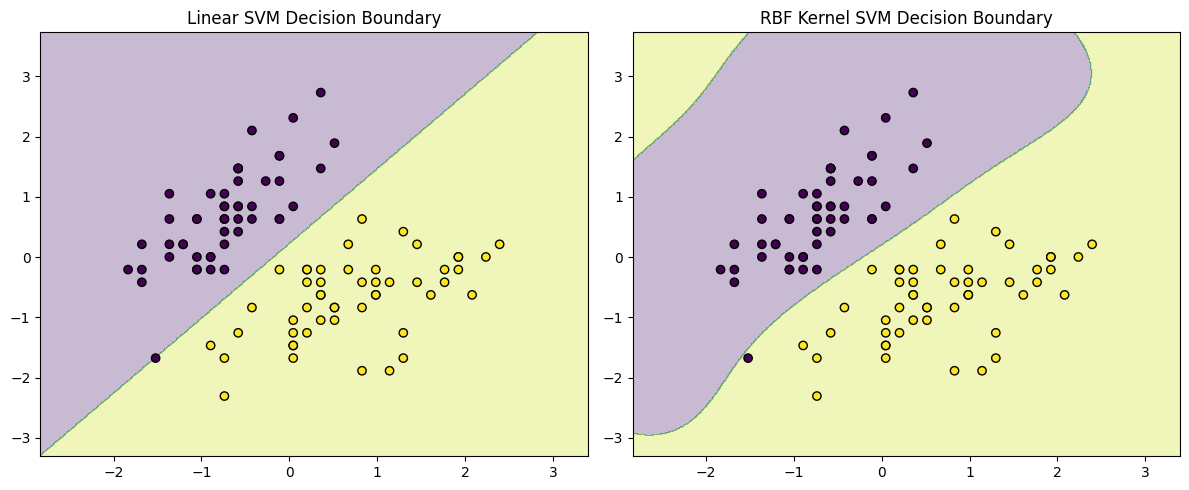

In [ ]:
xx, yy = np.meshgrid(
    np.linspace(X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1, 500),
    np.linspace(X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1, 500)
)
grid = np.c_[xx.ravel(), yy.ravel()]

Z_linear = svm_linear.predict(grid).reshape(xx.shape)
Z_rbf = svm_rbf.predict(grid).reshape(xx.shape)

plt.figure(figsize=(12, 5))

# Linear Kernel Plot
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_linear, alpha=0.3)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='k')
plt.title("Linear SVM Decision Boundary")

# RBF Kernel Plot
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_rbf, alpha=0.3)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='k')
plt.title("RBF Kernel SVM Decision Boundary")

plt.tight_layout()
plt.show()

## Step 7: Evaluate Model Performance

In [ ]:
y_pred_rbf = svm_rbf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Precision:", precision_score(y_test, y_pred_rbf))
print("Recall:", recall_score(y_test, y_pred_rbf))
print("Classification Report:\n", classification_report(y_test, y_pred_rbf))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



## Step 8: Confusion Matrix Visualization

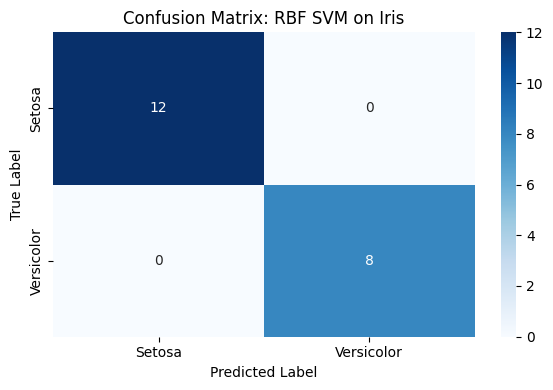

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_rbf)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Setosa", "Versicolor"],
            yticklabels=["Setosa", "Versicolor"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix: RBF SVM on Iris")
plt.tight_layout()
plt.show()